In [23]:
import pandas as pd
import seaborn as sns
%config IPcompleter.use_jedi=False
import numpy as np

In [24]:
df=pd.read_csv('C:\\Users\\ChefAbi\\Downloads\\heart_disease_dataset.csv',sep=";")

In [25]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [27]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [28]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='age', ylabel='Count'>

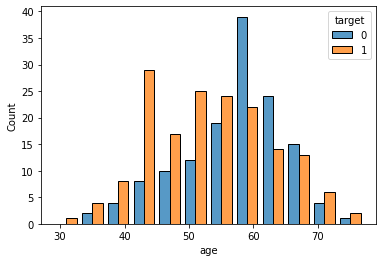

In [29]:
sns.histplot(data=df, x="age", hue="target", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='sex', ylabel='count'>

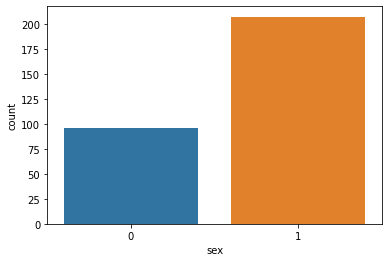

In [30]:
sns.countplot(data=df,x='sex')

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
array = df.values 

In [33]:
from sklearn.preprocessing import StandardScaler 


In [42]:
X = array[:,0:12]
Y = array[:,13].reshape((-1,1)) 
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 

In [43]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],6) 
        self.W2   = np.random.rand(6,4)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W2)
        d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
    
    def print_output(self):
        print(self.output)



In [44]:
epochs = 10
learning_rate = 0.5
ann = ArtificialNeuralNetwork(X,Y)
ann.train(epochs, learning_rate)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[-13.37641841 -12.02091657 -22.77700718 -23.69866919]
 [-13.37641841 -12.02091657 -22.77700718 -23.69866919]
 [-13.37641841 -12.02091657 -22.77700718 -23.69866919]
 [-13.37641841 -12.02091657 -22.77700718 -23.69866919]
 [-13.37641841 -12.02091657 -22.77700718 -23.69866919]
 [-13.37641841 -12.02091657 -22.77700718 -23.69866919]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1.95732224e-14 1.31500513e-12 4.40659060e-27 2.44746315e-28]
 [1.95732224e-14 1.31500513e-12 4.40659060e-27 2.44746315e-28]
 [1.95732224e-14 1.31500513e-12 4.40659060e-27 2.44746315e-28]
 [1.95732224e-14 1.31500513e-12 4.40659060e-27 2.44746315e-28]
 [1.95732224e-14 1.31500513e-12 4.40659060e-27 2.44746315e-28]
 [1.95732224e-14 1.31500513e-12 4.40659060e-27 2.447

In [45]:
ann.print_output()

[[5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]
 [5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]
 [5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]
 ...
 [5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]
 [5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]
 [5.93127950e-17 3.98486403e-15 1.33533048e-29 7.41655500e-31]]
